### Table of Contents

Use this table to navigate to the respective Section

- [0 Load Data and import libraries](#0load-the-data-and-import-libraries)
- [Q1](#q1)
    - [Q1.1 EDA Insights](#q11----eda-insights)
- [Q2](#q2)
    - [Q2.1 Clustering](#q21---clustering)
    - [Q2.2 Cluster definition and measurement](#q22---cluster-definition-and-measurement)
    - [Q2.3 Interpretation](#q23---model-evaluation)
- [Q3](#q3)
    - [Q3.1 Classification models](#q31---classification-models)
    - [Q3.2 Model evaluation](#q32---model-evaluation)
- [Q4](#q4)
    - [Q4.1 Recommendation system](#q41---recommendation-system)
    - [Q4.2 Model evaluation](#q42---model-evaluation)  
    - [Q4.3 Suggestions](#q43---suggestions)  

# 0 Load the Data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("SmartRetail_dataset.csv")
display(df.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Q1 
SmartRetail’s marketing team is eager to better understand customer behaviour before
implementing AI-driven solutions. Currently, the company lacks visibility into how different
customer segments interact with its platform. Without these insights, marketing efforts remain
inefficient and untargeted. A thorough data exploration process is required to uncover trends,
which will form the foundation for segmentation and predictive modelling efforts.
Generate visualizations (bar charts, histograms, heatmaps) to detect trends and summarize the
main customer spending patterns & engagement trends.

## Q1.1  - EDA Insights


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [6]:
#Identify missing values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [7]:
#Identify nan values
print("Checking for missing values:")
print(df.isna().sum())

Checking for missing values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [8]:
#Identify duplicates
print("Checking for duplicates:")
print(df.duplicated().sum())

Checking for duplicates:
0


**1. Insight:** No missing, duplicated values etc. in the data

Drop unneccessary features

In [9]:
df.drop(columns=["Location"], inplace =True)

In [10]:
#divide the data into numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns="Customer ID")

categorical_features = df.select_dtypes(include=["object","category"])

In [11]:
for variable in categorical_features:
    print(f"{variable}: {df[variable].unique()}")

Gender: ['Male' 'Female']
Item Purchased: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Size: ['L' 'S' 'M' 'XL']
Color: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']
Season: ['Winter' 'Spring' 'Summer' 'Fall']
Subscription Status: ['Yes' 'No']
Shipping Type: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
Discount Applied: ['Yes' 'No']
Promo Code Used: ['Yes' 'No']
Payment Method: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']
Frequency of Purchases: ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Eve

In [ ]:
#apply the correct mapping of the Frequency of Purchases feature

freq_mapping = {        
    'Weekly': 52,         # 52 times per year
    'Fortnightly': 26,    # 26 times per year
    'Bi-Weekly':26,       # 26 times per year (its the same as Fortnightly!)
    'Monthly': 12,        # 12 times per year
    'Every 3 Months': 4,  # 4 times per year
    'Quarterly': 4,       # 4 times per year (its the same as every 3 months)
    'Annually': 1         # 1 time per year
}

df["Frequency of Purchases"] = df["Frequency of Purchases"].map(freq_mapping)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,26
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,26
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,52
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,52
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,1


**2.Insight:** Every 3 Months is the same as quarterly and bi-weekly is the same as fortnightly and must therefore be mapped to the same value

In [13]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns="Customer ID")

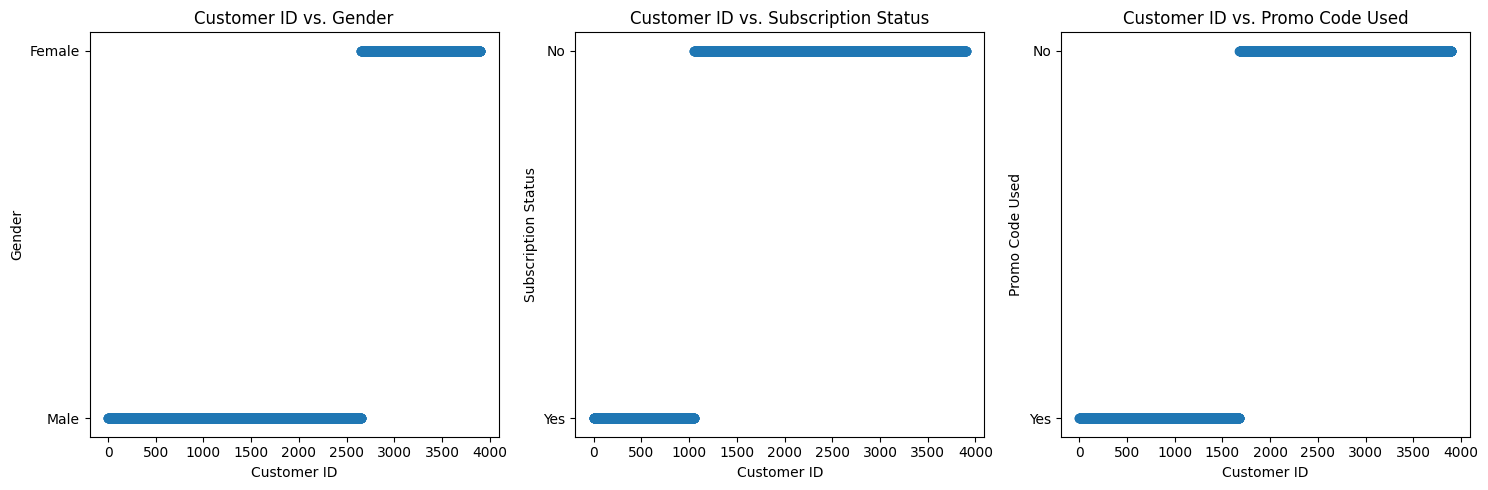

In [ ]:
# selected categorical features
categorical_features_subset = ["Gender", "Subscription Status", "Promo Code Used"]

# number of features
num_features = len(categorical_features_subset)

# define subplots
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))  


# create scatter plots
for i, feature in enumerate(categorical_features_subset):

    axes[i].scatter(df["Customer ID"], df[feature])
    axes[i].set_xlabel("Customer ID")
    axes[i].set_ylabel(feature)
    axes[i].set_title(f"Customer ID vs. {feature}")

plt.tight_layout()
plt.show()



**3.Insight:** we can see, that there is a clear correlation between customer id and those 3 features. We need to be careful and exclude customer ID, as it might lead us to wrong conclusions

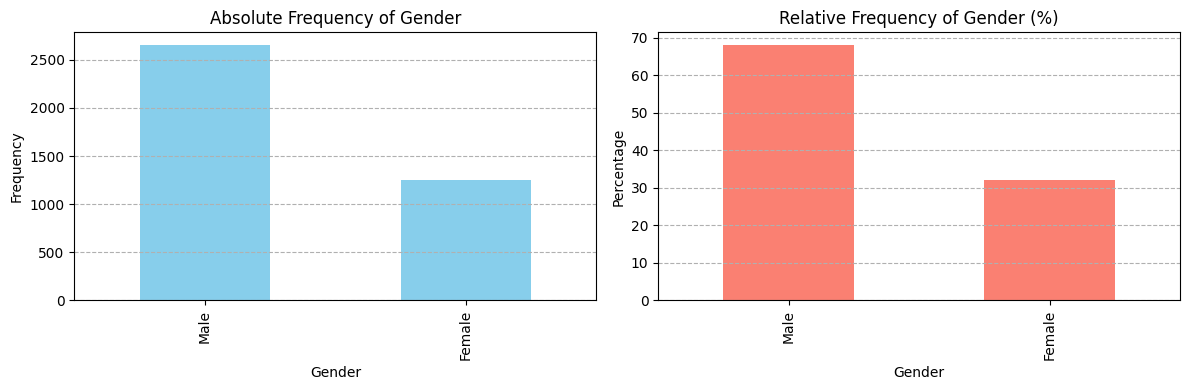

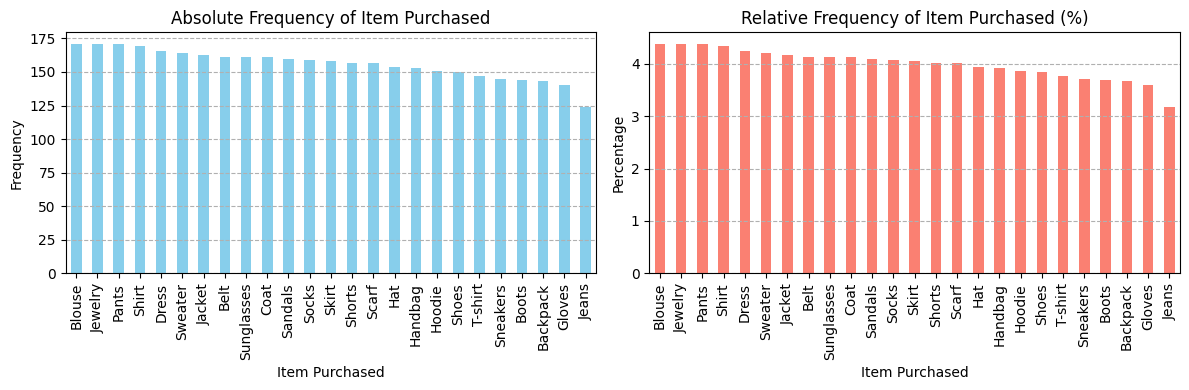

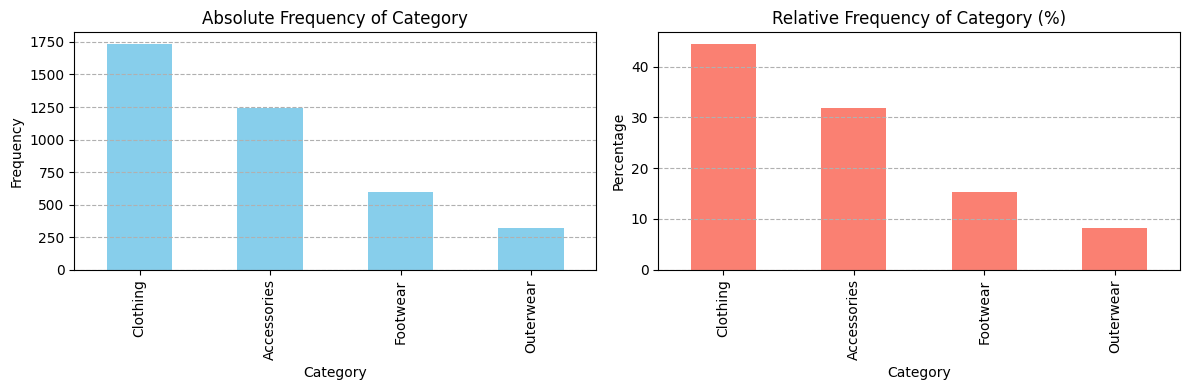

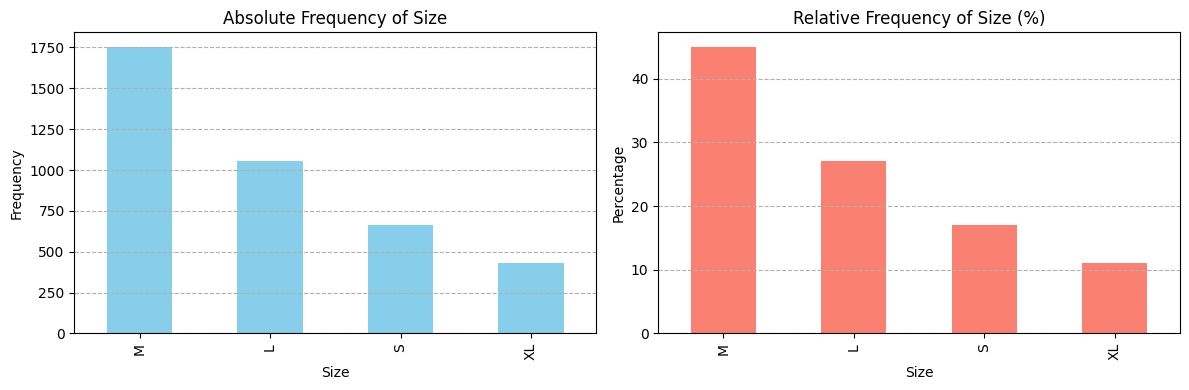

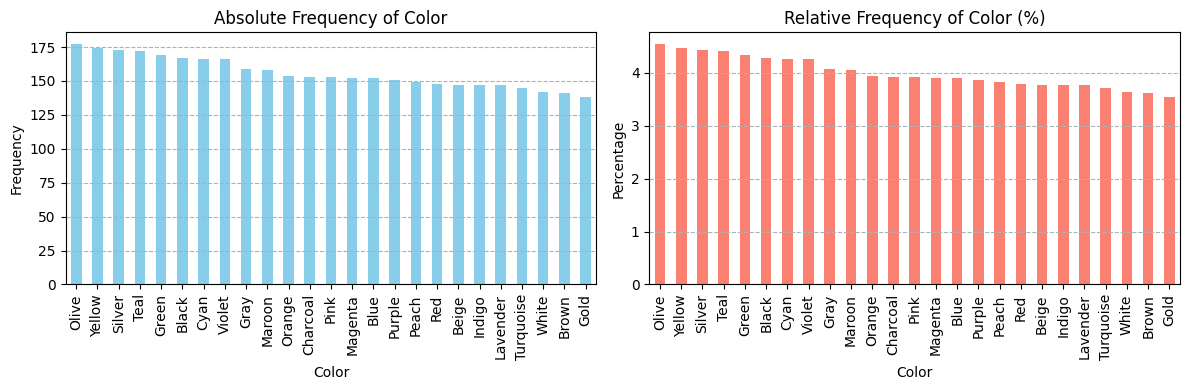

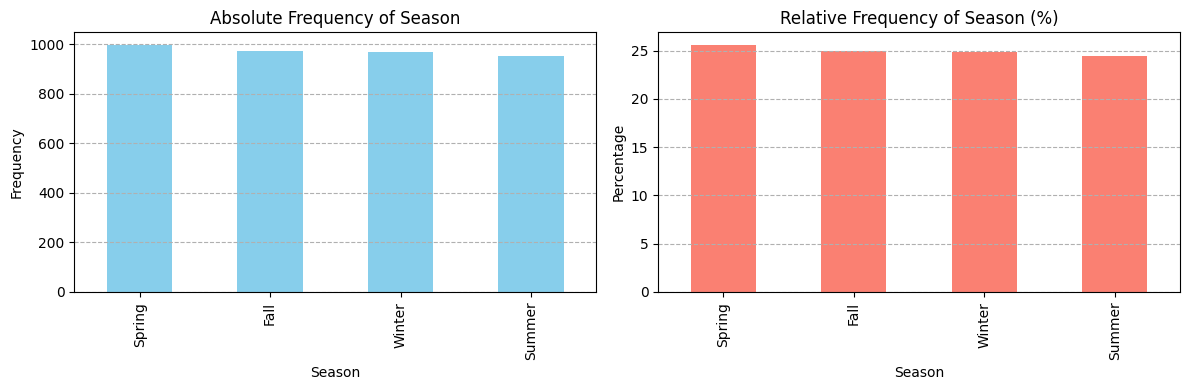

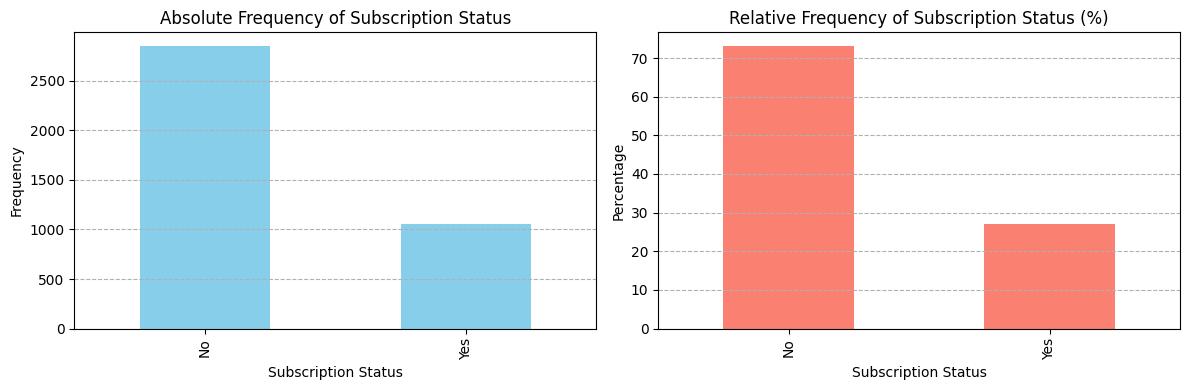

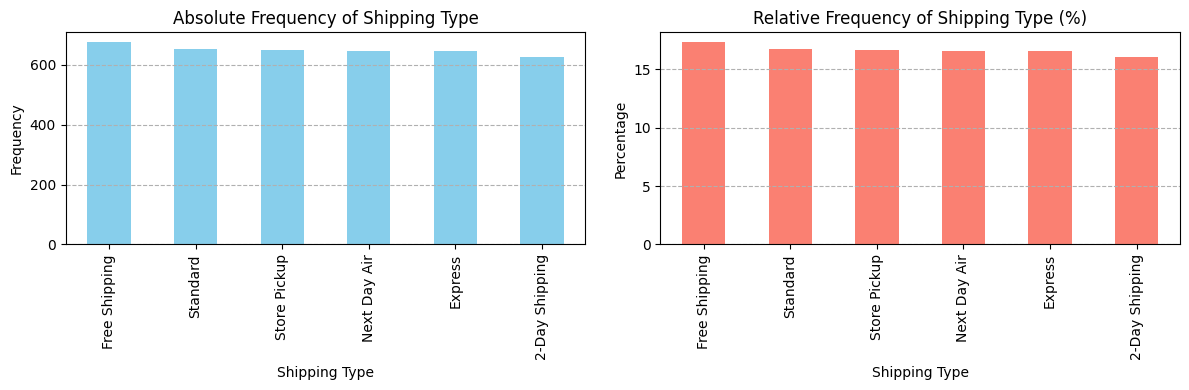

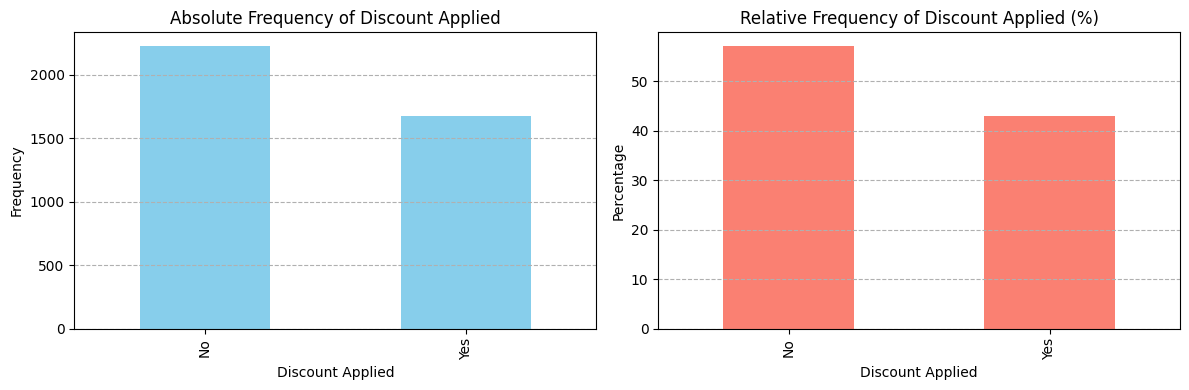

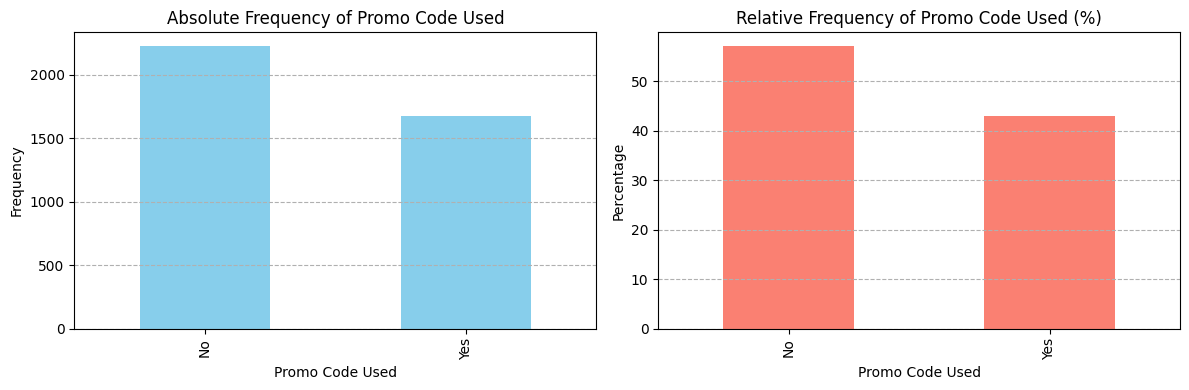

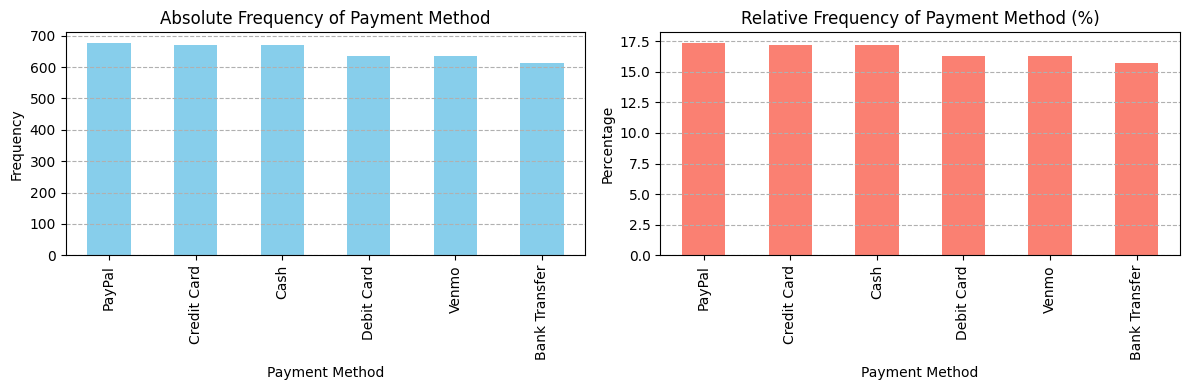

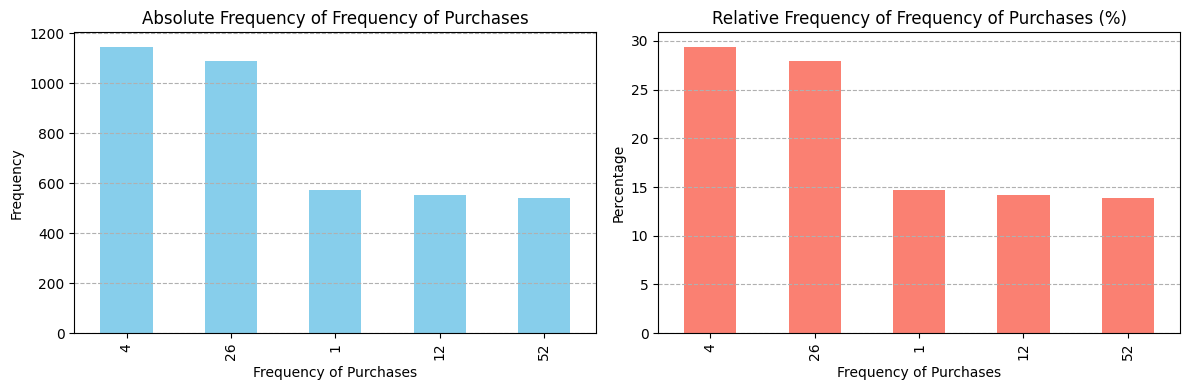

In [15]:
def plot_frequency(variable):
# Calculate absolute frequency
    abs_freq = df[variable].value_counts()
    
    # Calculate relative frequency
    rel_freq = df[variable].value_counts(normalize=True) * 100
    
    # Plotting
    plt.figure(figsize=(12, 4))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {variable} (%)')
    plt.xlabel(variable)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()

for variable in categorical_features:
    plot_frequency(variable)

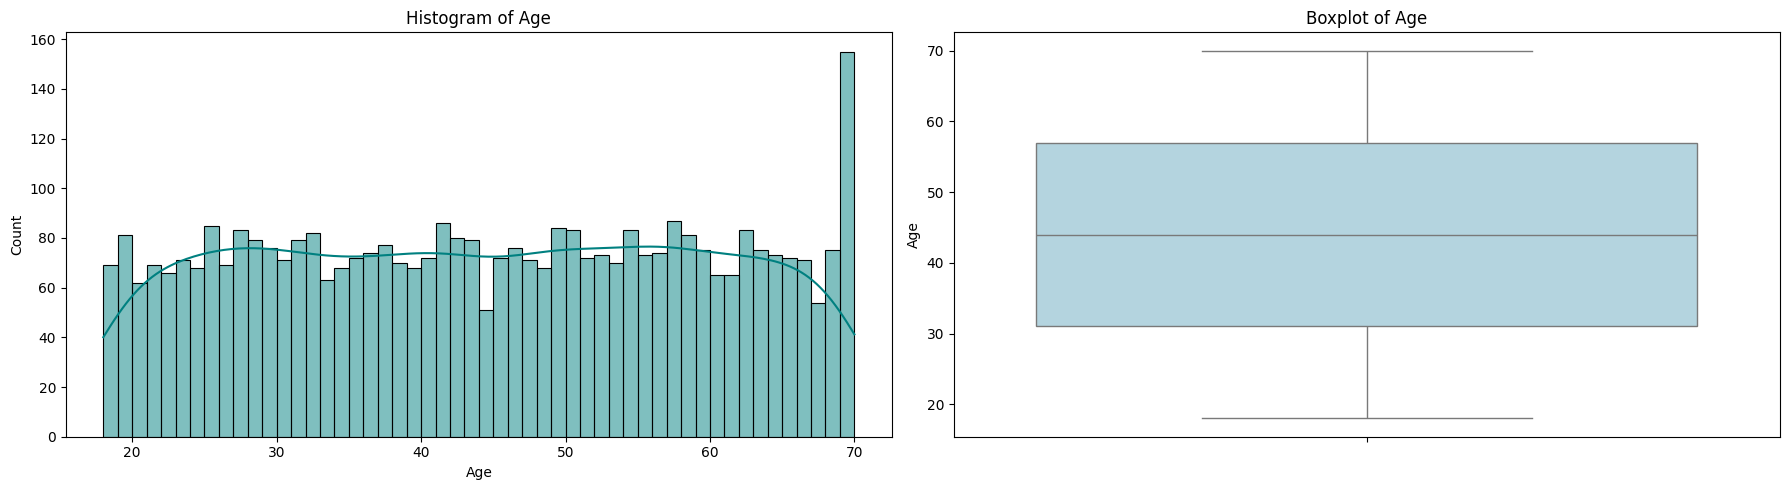

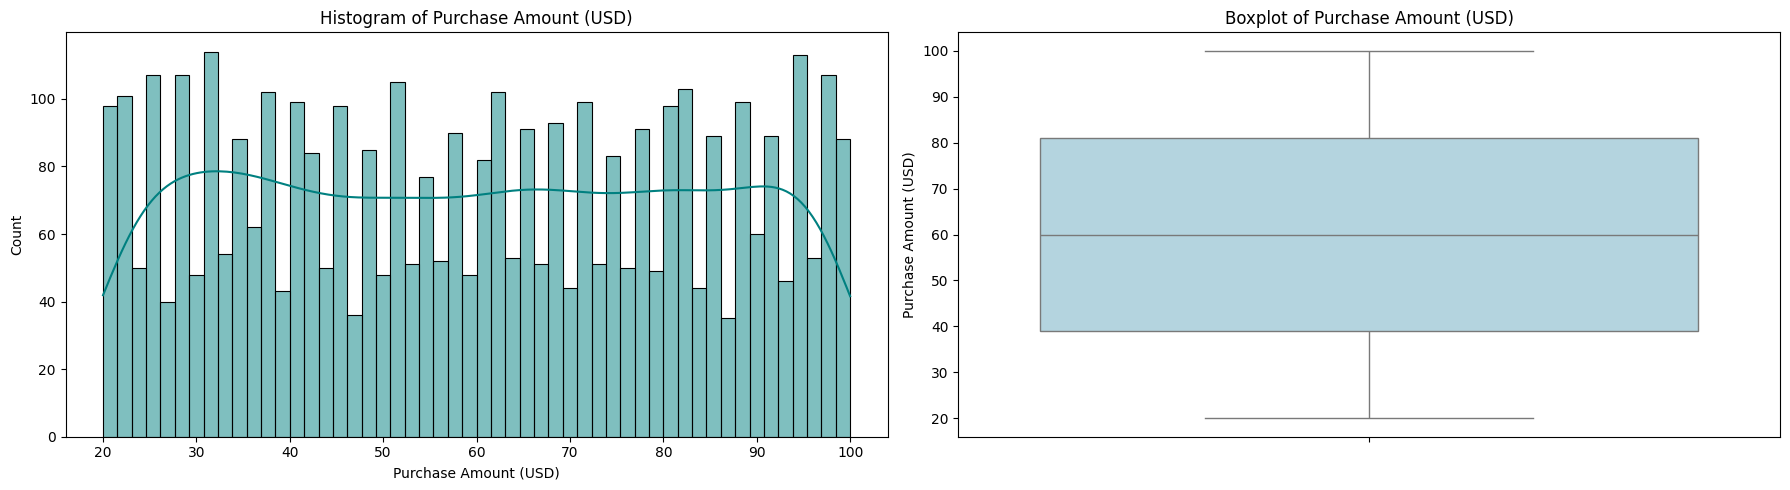

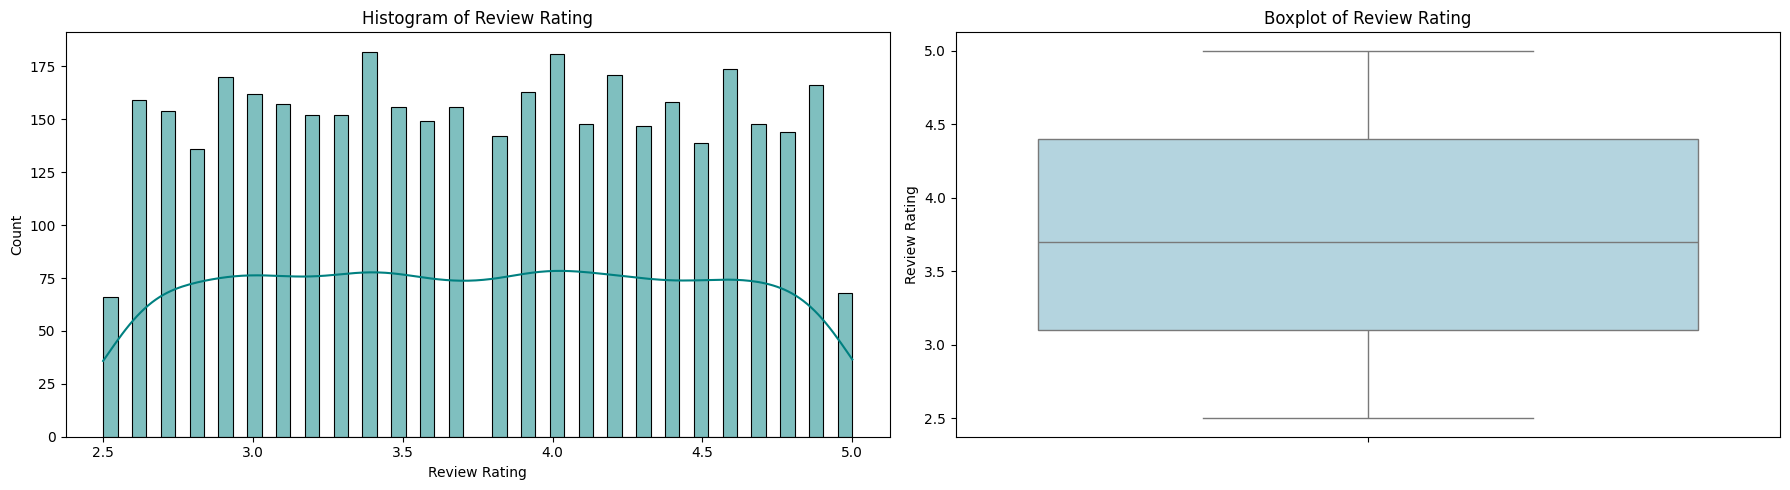

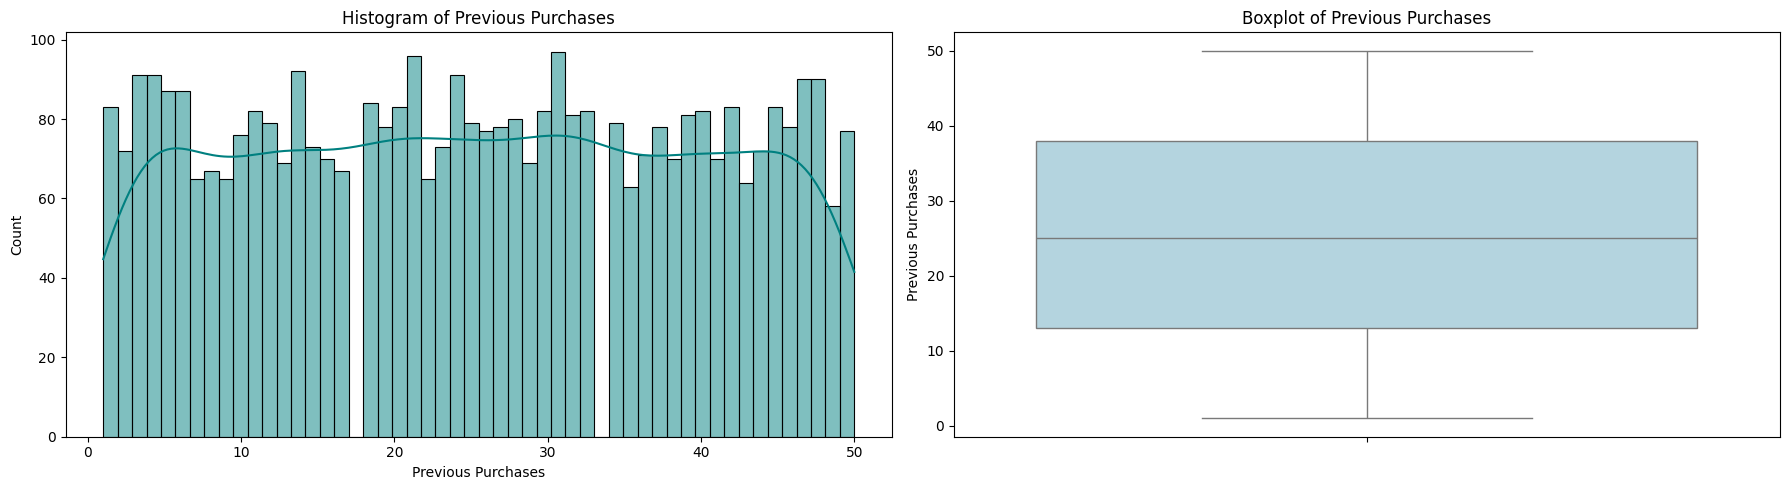

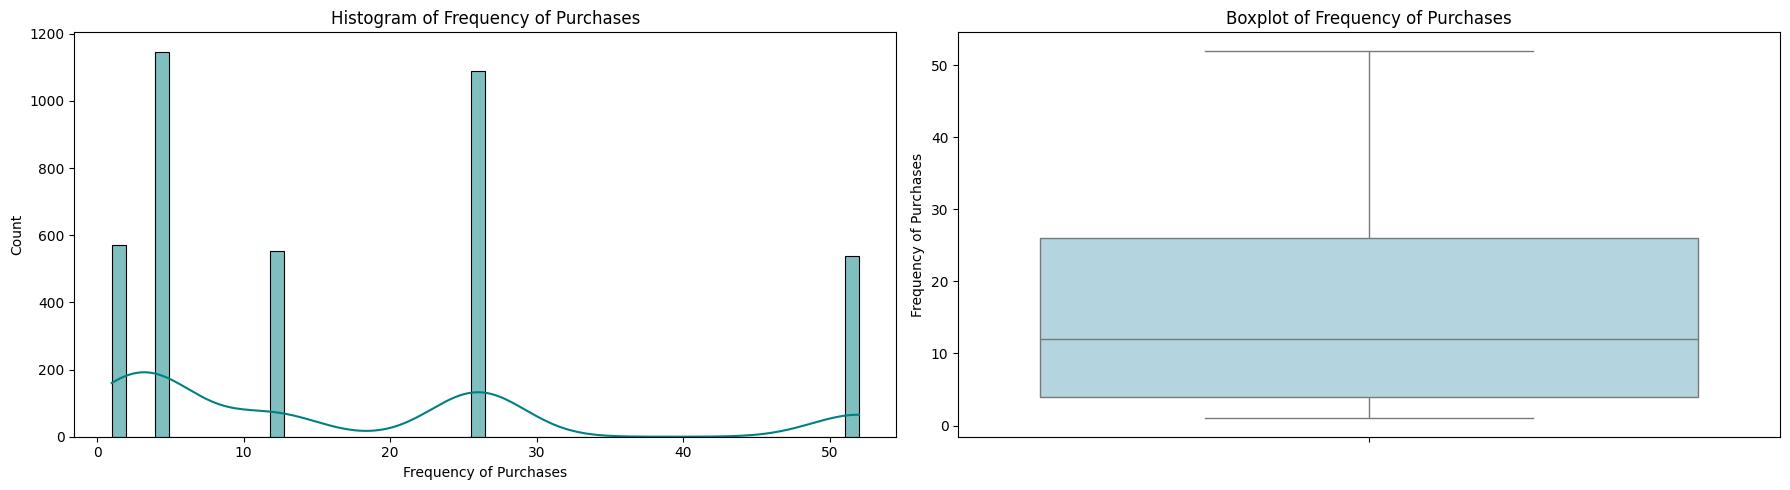

In [16]:
def kernel_hist_box_plot(variable):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))  #2 subplots
    # Histogram (left)
    sns.histplot(df[variable], bins=52, kde=True, color='teal', ax=axes[0])
    axes[0].set_title(f"Histogram of {variable}")
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Count')

    # Boxplot (right)
    sns.boxplot(y=df[variable], color='lightblue', ax=axes[1])
    axes[1].set_title(f"Boxplot of {variable}")
    axes[1].set_ylabel(variable)

    plt.tight_layout()
    plt.show()

# Iterations
for variable in numerical_features:
    kernel_hist_box_plot(variable)

Correlation Matrix

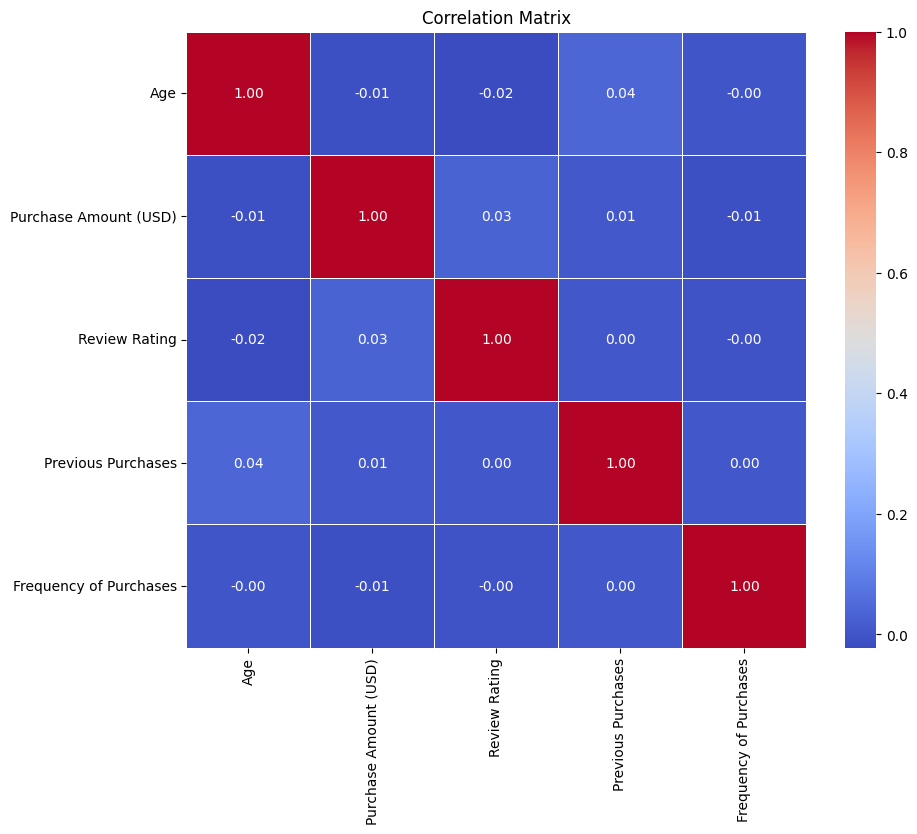

In [17]:
# Creating the correlation matrix
correlation_matrix = numerical_features.corr()

#Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**4. Insight:** We can see, that there are no correlations at all in the numerical data. One would expect at least some correlation between previous purchases and frequency of purchases, because a person that buys more frequently should have a higher number of previous purchases. But this is not the case here.

<Figure size 2000x600 with 0 Axes>

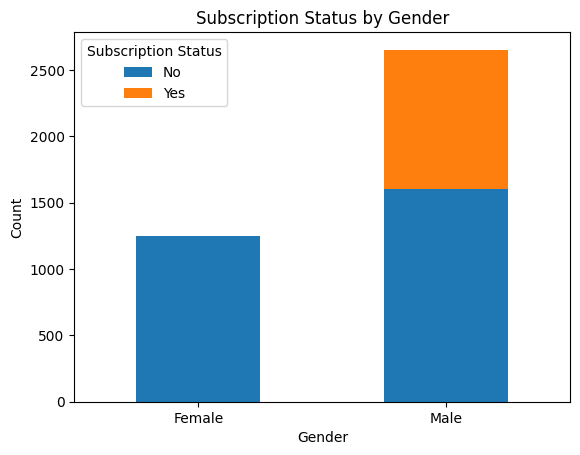

In [18]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**5. Insight:** There are no female subscribers and slightly more male subscribers than non-subscribers

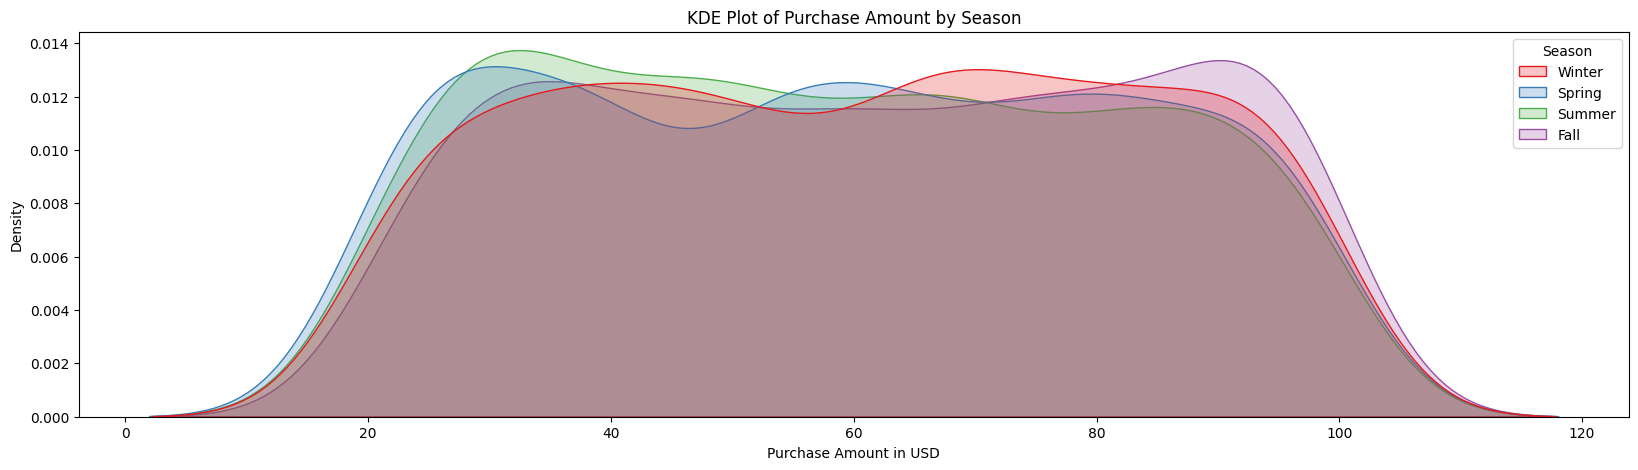

In [19]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

# Q2

SmartRetail’s marketing team recognizes that different customer groups have distinct shopping
behaviors, preferences, and spending habits. By continuing with a one-size-fits-all marketing
approach, the company risks alienating high-value customers while overspending on
ineffective promotions for low-value segments. The goal is to identify actionable customer
segments that will allow SmartRetail to tailor its marketing campaigns for maximum impact.

## Q2.1 - Clustering

Lets divide our customers in clusters

Normalization:

Normalize all data, make sure that all categorical features are represented as numericals and that numerical data is standardized. categorical features with a logical order should receive that order, others that dont have an order should be made to dummies, so that no non existing order is used on them.

In [20]:
#dropped features: "Season", "Color","Category","Shipping Type","Item Purchased","Payment Method"
nominal_features =["Gender","Subscription Status","Discount Applied","Promo Code Used"]
ordinal_features = ["Size"]

#numerical Scaling
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(numerical_features)
X_Scaled_df = pd.DataFrame(X_Scaled, columns=list(numerical_features))

#One Hot Encoding
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[nominal_features])


one_hot_encoded_df = pd.DataFrame(
    one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_features))

# Define custom order for each ordinal feature
custom_orders = {"Size": ["S", "M", "L", "XL"]}  # Custom order for Size (instead of alphabetical)

# Apply custom label encoding using pd.Categorical
ordinal_encoded_df = df[ordinal_features].copy()

for feature, order in custom_orders.items():
    ordinal_encoded_df[feature] = pd.Categorical(df[feature], categories=order, ordered=True).codes

    # Print the new custom mapping
    print(f"Custom Label Encoding for '{feature}':")
    for category, code in zip(order, range(len(order))):
        print(f"  {category} -> {one_hot_encoded_df}")
    print()  # Newline for readability

#final_df= without ordinal_encoded_df
final_df = pd.concat([X_Scaled_df,one_hot_encoded_df], axis=1)

final_df.head()

Custom Label Encoding for 'Size':
  S ->       Gender_Male  Subscription Status_Yes  Discount Applied_Yes  \
0             1.0                      1.0                   1.0   
1             1.0                      1.0                   1.0   
2             1.0                      1.0                   1.0   
3             1.0                      1.0                   1.0   
4             1.0                      1.0                   1.0   
...           ...                      ...                   ...   
3895          0.0                      0.0                   0.0   
3896          0.0                      0.0                   0.0   
3897          0.0                      0.0                   0.0   
3898          0.0                      0.0                   0.0   
3899          0.0                      0.0                   0.0   

      Promo Code Used_Yes  
0                     1.0  
1                     1.0  
2                     1.0  
3                     1.0  
4 

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency of Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes
0,0.718913,-0.285629,-0.907584,-0.785831,0.507436,1.0,1.0,1.0,1.0
1,-1.648629,0.178852,-0.907584,-1.616552,0.507436,1.0,1.0,1.0,1.0
2,0.390088,0.558882,-0.907584,-0.162789,2.054365,1.0,1.0,1.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,2.054365,1.0,1.0,1.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,-0.979997,1.0,1.0,1.0,1.0


In [21]:
# Compute variance only for numerical features
numerical_variances = numerical_features.var().sort_values()
print(numerical_variances)

Review Rating               0.512975
Previous Purchases        208.719426
Age                       231.270767
Frequency of Purchases    282.564192
Purchase Amount (USD)     560.997806
dtype: float64


## PCA

Conduct PCA to reduce dimensionality

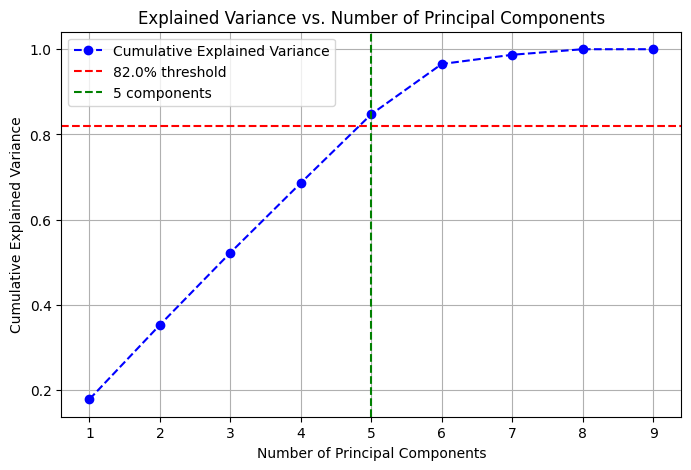

Number of components needed to retain at least 82.0% variance: 5


In [22]:
# Step 1: Apply PCA
pca = PCA()
pca.fit(final_df)

m=0.82
# Step 2: Calculate cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Determine number of components that explain at least 95% of variance
d = np.argmax(cumsum >=m) + 1  # +1 because indexing starts at 0

# Step 4: Plot the Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker="o", linestyle="--", color="b", label="Cumulative Explained Variance")
plt.axhline(y=m, color="r", linestyle="--", label=f"{m*100}% threshold")
plt.axvline(x=d, color="g", linestyle="--", label=f"{d} components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.legend()
plt.grid()
plt.show()

print(f"Number of components needed to retain at least {m*100}% variance: {d}")


We started to keep 5 principal components to retain more than 82% of the variance, but the result was a low silhoutte score in all clustering algorithms. We therefore traded some explained variance for a higher silhoutte score and chose 3 Principal components as the optimal tradeoff.

In [23]:
# Define the opimal number of components you chose 
d_optimal = 3

# Apply PCA transformation
pca_final = PCA(n_components=d_optimal)
X_pca = pca_final.fit_transform(final_df)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(d_optimal)])

# Show the transformed data
print(X_pca_df.head())


        PC1       PC2       PC3
0  0.813283 -0.879572 -0.011367
1 -1.212403 -1.869917  0.142492
2  0.770710 -0.429339  1.536959
3 -0.202018  0.704939  2.261980
4  1.024616 -0.420445 -1.249372


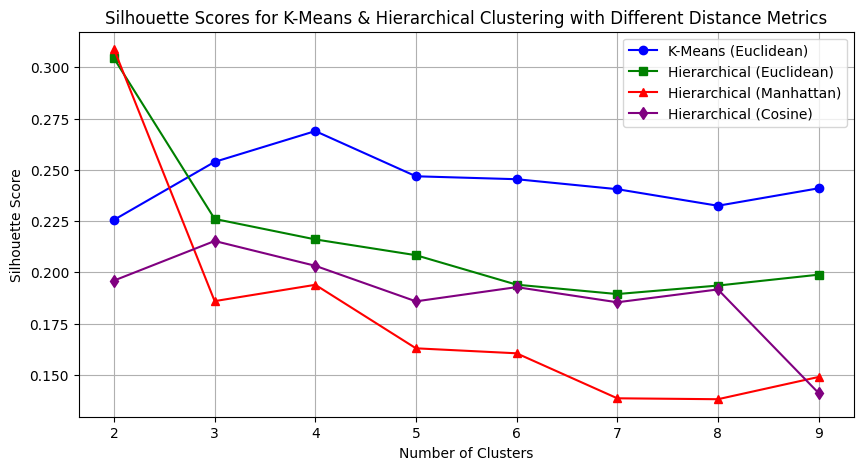

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of clusters for K-Means and Hierarchical
cluster_range = range(2, 10)  # Testing from 2 to 9 clusters

# Store silhouette scores for different distance metrics in Hierarchical Clustering
kmeans_scores = []
hierarchical_euclidean_scores = []
hierarchical_manhattan_scores = []
hierarchical_cosine_scores = []

# Compute silhouette scores for K-Means and Hierarchical Clustering with different distance metrics
for k in cluster_range:
    # K-Means (always uses Euclidean)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_pca)
    kmeans_scores.append(silhouette_score(X_pca, kmeans_labels))

    # Hierarchical Clustering - Euclidean (default)
    hierarchical_euclidean = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    hierarchical_euclidean_labels = hierarchical_euclidean.fit_predict(X_pca)
    hierarchical_euclidean_scores.append(silhouette_score(X_pca, hierarchical_euclidean_labels))

    # Hierarchical Clustering - Manhattan
    hierarchical_manhattan = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='complete')
    hierarchical_manhattan_labels = hierarchical_manhattan.fit_predict(X_pca)
    hierarchical_manhattan_scores.append(silhouette_score(X_pca, hierarchical_manhattan_labels))

    # Hierarchical Clustering - Cosine
    hierarchical_cosine = AgglomerativeClustering(n_clusters=k, metric='cosine', linkage='average')
    hierarchical_cosine_labels = hierarchical_cosine.fit_predict(X_pca)
    hierarchical_cosine_scores.append(silhouette_score(X_pca, hierarchical_cosine_labels))

# Plot silhouette scores for different clustering algorithms and distance metrics
plt.figure(figsize=(10, 5))

plt.plot(cluster_range, kmeans_scores, marker='o', linestyle='-', label="K-Means (Euclidean)", color='blue')
plt.plot(cluster_range, hierarchical_euclidean_scores, marker='s', linestyle='-', label="Hierarchical (Euclidean)", color='green')
plt.plot(cluster_range, hierarchical_manhattan_scores, marker='^', linestyle='-', label="Hierarchical (Manhattan)", color='red')
plt.plot(cluster_range, hierarchical_cosine_scores, marker='d', linestyle='-', label="Hierarchical (Cosine)", color='purple')

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means & Hierarchical Clustering with Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**  
the highest silhoutte score is for the hierarchical (euclidean) and the hierarchical (manhattan) clustering with 0.3 for k=2 clusters. The next best score has the K-means (euclidean) clustering method with approx. 0.27 for k=4 clusters.

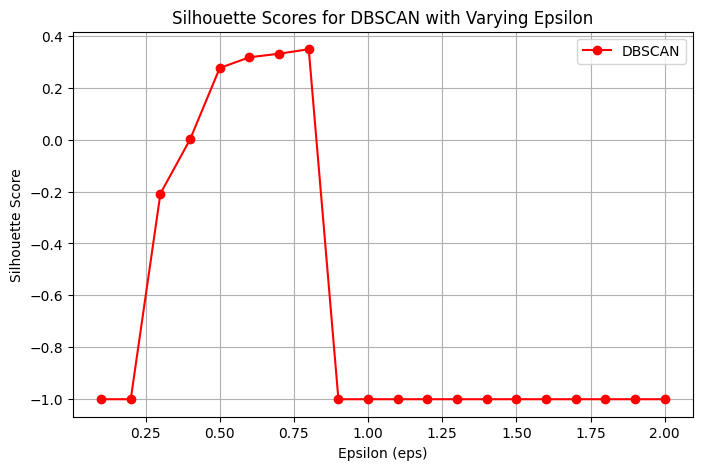

In [25]:
# Define range of eps values to test
eps_values = np.linspace(0.1, 2.0, 20)  # Testing eps from 0.1 to 2.0

# Store silhouette scores for DBSCAN
dbscan_scores = []

# Compute silhouette scores for each eps value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=20)  # Keeping min_samples fixed
    dbscan_labels = dbscan.fit_predict(X_pca)

    if len(set(dbscan_labels)) > 1:  # Only compute silhouette score if more than 1 cluster is found
        dbscan_scores.append(silhouette_score(X_pca, dbscan_labels))
    else:
        dbscan_scores.append(-1)  # Assign -1 if clustering is invalid

# Plot silhouette scores for DBSCAN
plt.figure(figsize=(8, 5))
plt.plot(eps_values, dbscan_scores, marker='o', linestyle='-', color='red', label="DBSCAN")

plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for DBSCAN with Varying Epsilon")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**  
Based on 3 Principal components, we set the min_samples to 20 and tested different epsilon values. DBSCAN reaches higher silhoutte scores than hierarchical and k-means clustering methods, namely almost 0.4 for Epsilon of 0.75.

Number of clusters found: 1
Number of noise points: 6


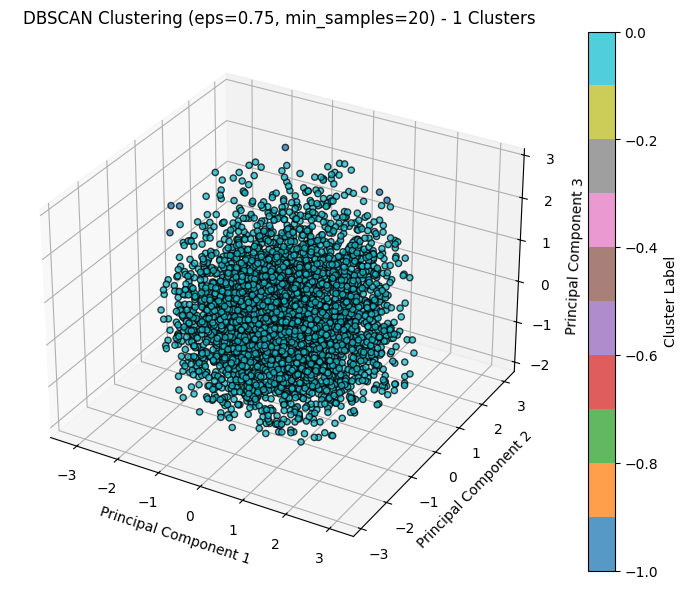

        PC1       PC2       PC3  Cluster
0  0.813283 -0.879572 -0.011367        0
1 -1.212403 -1.869917  0.142492        0
2  0.770710 -0.429339  1.536959        0
3 -0.202018  0.704939  2.261980        0
4  1.024616 -0.420445 -1.249372        0


In [49]:
# Apply DBSCAN with optimal parameters
eps_value = 0.75
min_samples_value = 20

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_pca)

# Count clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = np.sum(labels == -1)

print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# Assign labels to customers
X_pca_df['Cluster'] = labels

# 3D Visualization of DBSCAN clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap="tab10", edgecolor='k', alpha=0.75)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value}) - {num_clusters} Clusters")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

# Display labeled data
print(X_pca_df.head())


**Answer to Q2.1.:**

As DBSCAN yielded the highest silhoutte score, we applied this method with the optimal parameters. But we only find one cluster. if we manually change the parameters we can gain more clusters but we also have much noise and lower silhoutte score. DBSCAN doesnt seem applicable for our problem.  
    
We therefore go back to our graph above and compare K-means with the different hierarchical algorithms.  
Here the highest silhoutte score was k=2 clusters for the Hierarchical methods (silhoutte score=0.3), but the clusters were not well interpretable.  
  
Therefore we now use the the K-means clustering and set the optimal k to 4, as we still have a moderately high silhoutte score of 0.275, and well defined clusters.

**Key Takeaways:** number of clusters k=4 based on the explanation+codes above

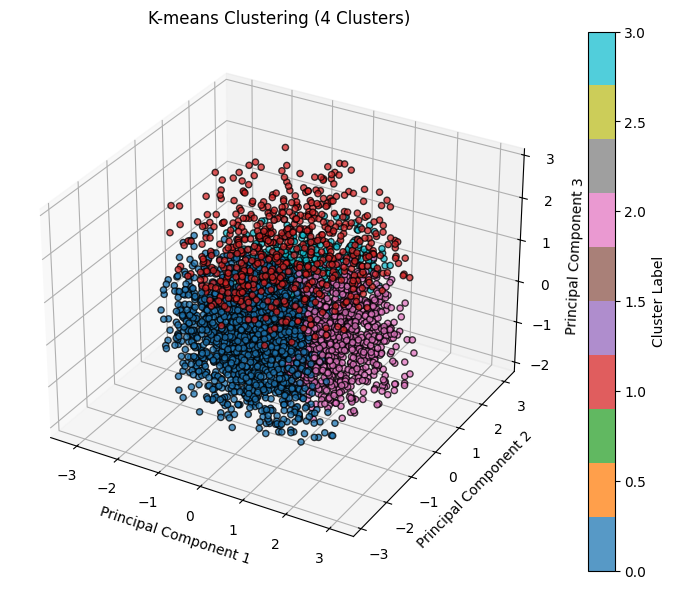

,PC1,PC2,PC3,Cluster
0,0.813283,-0.879572,-0.011367,0
1,-1.212403,-1.869917,0.142492,0
2,0.770710,-0.429339,1.536959,1
3,-0.202018,0.704939,2.261980,1
4,1.024616,-0.420445,-1.249372,2
5,1.371549,-2.257875,1.467548,1
6,1.381532,1.821833,-0.869283,2
7,0.299963,-1.931032,1.804720,1
8,-1.191864,-0.711384,-1.492113,0
9,-0.375131,-0.507651,-0.586669,0


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

# Set the number of clusters
num_clusters = 4

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
labels = hierarchical.fit_predict(X_pca)

# Assign labels to customers
X_pca_df['Cluster'] = labels

# 3D Visualization of Hierarchical Clustering clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap="tab10", edgecolor='k', alpha=0.75)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"K-means Clustering ({num_clusters} Clusters)")
plt.colorbar(scatter, label="Cluster Label")
plt.show()

# Display labeled data
from IPython.display import display
display(X_pca_df.head(10))


**Extension to Q2.1.:**  
In this graph we can much better see 4 distinct clusters. In the next step we will take a look at the characteristics of the clusters

In [28]:
final_df["Cluster"] = X_pca_df["Cluster"]
final_df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency of Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes,Cluster
0,0.718913,-0.285629,-0.907584,-0.785831,0.507436,1.0,1.0,1.0,1.0,0
1,-1.648629,0.178852,-0.907584,-1.616552,0.507436,1.0,1.0,1.0,1.0,0
2,0.390088,0.558882,-0.907584,-0.162789,2.054365,1.0,1.0,1.0,1.0,1
3,-1.517099,1.276716,-0.349027,1.637107,2.054365,1.0,1.0,1.0,1.0,1
4,0.061263,-0.454531,-1.466141,0.391025,-0.979997,1.0,1.0,1.0,1.0,2


In [29]:
final_df.groupby(by="Cluster").mean()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency of Purchases,Gender_Male,Subscription Status_Yes,Discount Applied_Yes,Promo Code Used_Yes
Cluster,,,,,,,,,
0,-0.397016,-0.072331,-0.057040,-0.558324,-0.324666,0.664882,0.254818,0.416488,0.416488
1,-0.054957,-0.126929,0.102400,0.012780,1.950691,0.684303,0.292769,0.439153,0.439153
2,0.776475,-0.257737,-0.419132,0.675152,-0.385693,0.707566,0.291411,0.467280,0.467280
3,0.027502,0.942813,0.941275,0.770848,-0.251246,0.677618,0.258727,0.396304,0.396304


In [30]:
df["Cluster"] = X_pca_df["Cluster"]
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,26,0
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,26,0
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,52,1
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,52,1
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,1,2


In [31]:
# Group by cluster and analyze categorical + numerical variables
cluster_summary = df.groupby("Cluster").agg(
    {col: "mean" if df[col].dtype != "object" else lambda x: x.mode()[0] for col in df.columns if col != "Cluster"})
# Select only the columns you want to display
selected_columns = ["Age","Purchase Amount (USD)","Review Rating","Previous Purchases","Frequency of Purchases"]
cluster_summary_selected = cluster_summary[selected_columns]

# Display results
cluster_summary_selected.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Frequency of Purchases
Cluster,,,,,
0,38.031585,58.051392,3.709101,17.286403,12.014454
1,43.232804,56.758377,3.823280,25.536155,50.257496
2,55.875256,53.660532,3.449796,35.104294,10.988753
3,44.486653,82.092402,4.424025,36.486653,13.248460


## Q2.2 - Cluster definition and measurement

As mentioned before we used the silhoutte score to measure how well defined the clusters are. The 4 clusters have a silhoutte score of around 0.27, meaning the clusters are moderately well defined.   
Also visually you can see the 4 different clusters quite well and seperated.   
Additionally, when grouping the original dataframe and the encoded dataframe by the clusters and compute the mean values, we can see 4 different segments.  
In this way we found the bast trade off between silhoutte score, visual representation and interpretability to gain 4 seperate, well defined clusters.

## Q2.3 - Model evaluation



**Cluster 0**: Moderate Spenders with Balanced Behavior
Customers in Cluster 0 exhibit moderate spending habits, with an average purchase amount of $58.05. They maintain a balanced shopping frequency, making them neither the most nor the least active buyers. Their average age is around 38 years, indicating a relatively younger demographic. They have a previous purchase history of 17.29 purchases, which is moderate compared to other segments. The frequency of their purchases is around 12.01, showing that they shop occasionally but not at an extremely high rate. In terms of engagement with discounts, approximately 44% of this segment applies discounts and promo codes during purchases, indicating that while they take advantage of promotions, they do not rely on them as heavily as other groups.

**Cluster 1**: Frequent Buyers with Moderate Spending
Cluster 1 represents the most frequent shoppers, with a purchase frequency of 50.26—the highest among all clusters. Despite their high engagement, their average purchase amount is $56.76, which is slightly lower than Cluster 0. These customers have an average age of 43 years, making them slightly older than those in Cluster 0. Their previous purchase history stands at 25.54, indicating that they have been repeat customers over time. They are also highly engaged with discounts and promo codes, with about 43.9% using promotions, suggesting that they are deal-seekers who respond well to offers.

**Cluster 2**: Older Customers with Lower Purchase Frequency
Cluster 2 consists of the oldest customers, with an average age of 55.87 years. Their average purchase amount is the lowest among all groups, at $53.66, indicating a more conservative spending pattern. They also have a lower purchase frequency of 10.99, suggesting that they are infrequent shoppers. However, their previous purchases average 35.10, showing that while they have been customers for a long time, they do not shop as often anymore. Their engagement with discounts and promotions is relatively high, with around 46% using discounts during purchases.

**Cluster 3**: High-Value Customers with Premium Spending
Cluster 3 is composed of the highest-spending customers, with an average purchase amount of $82.09, significantly higher than any other group. They also have the highest review ratings, averaging 4.42, suggesting that they are highly satisfied with their purchases. While their purchase frequency is 13.25, which is not the highest, their previous purchase history is 36.49, meaning they are repeat customers who have been loyal to the business. Unlike Cluster 1, which relies on discounts, only 39.6% of Cluster 3 uses discounts and promotions, indicating that they are less price-sensitive and more likely to purchase without needing incentives.

Each of these clusters represents a distinct shopping behavior, with differences in spending, purchase frequency, and engagement with promotions. The segmentation highlights varying levels of customer engagement, from frequent but lower-value buyers to high-value, premium shoppers.

# Q3 

Customer retention remains a key challenge for SmartRetail. SmartRetail is concerned about
customer retention. Instead of predicting churn, the company wants to be able to identify loyal
customers who consistently shop and engage with the platform thought subscription. This will
help enhance loyalty programs and retention strategies.

## Q3.1 - Classification Models

We will now develop two models to answer the company need and justify our model choice.

**Which models to choose?**  
Based on the scikit-learn algorithm sheet `Scikit_Learn_Algorithm_Choice.pdf` we have:  
-> more than 50 samples  
-> predicting a category  
-> we have labeled data  
-> less than 100k samples  

Recommended Algorithms:  
-> KNeigbors Classifier    
-> if "not working"  
-> use SVC or **Ensemble Classifiers**

We will therefore initialize Ensemble Classifiers (Random Forest and XGBoost)

**Definition of a Loyal Customer:**  
Subsription status == Yes OR Higher Frequency of Purchases than the average AND more previous purchases than the average.

First we load the data again, and prepare it similarly to before

In [32]:
df = pd.read_csv("SmartRetail_dataset.csv")

In [33]:
freq_mapping = {        
    'Weekly': 52,         # 52 times per year
    'Fortnightly': 26,    # 26 times per year
    'Bi-Weekly':26,       # 26 times per year (its the same as Fortnightly!)
    'Monthly': 12,        # 12 times per year
    'Every 3 Months': 4,  # 4 times per year
    'Quarterly': 4,       # 4 times per year (its the same as every 3 months)
    'Annually': 1         # 1 time per year
}

df["Frequency of Purchases"] = df["Frequency of Purchases"].map(freq_mapping)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,26
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,26
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,52
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,52
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,1


In [34]:
# Calculate the average values for purchase behavior
avg_freq_purchases = df["Frequency of Purchases"].mean()
avg_prev_purchases = df["Previous Purchases"].mean()

# Define loyalty: Customers must be subscribed AND above average in both metrics
df["Loyal_Customer"] = ((df["Subscription Status"] == "Yes") | 
                         (df["Frequency of Purchases"] > avg_freq_purchases) &
                         (df["Previous Purchases"] > avg_prev_purchases)).astype(int)

# Show the first rows with the new column
display(df[["Subscription Status", "Frequency of Purchases", "Previous Purchases", "Loyal_Customer"]].head())



,Subscription Status,Frequency of Purchases,Previous Purchases,Loyal_Customer
0,Yes,26,14,1
1,Yes,26,2,1
2,Yes,52,23,1
3,Yes,52,49,1
4,Yes,1,31,1


In [35]:
df["Loyal_Customer"].value_counts()

Loyal_Customer
0    2281
1    1619
Name: count, dtype: int64

In [36]:
#dropped features: "Subscription Status"
nominal_features =["Gender","Location","Discount Applied","Promo Code Used","Season", "Color","Category","Shipping Type","Item Purchased","Payment Method"]
ordinal_features = ["Size"]
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer ID","Frequency of Purchases","Previous Purchases"])
label = ["Loyal_Customer"]

#numerical Scaling
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(numerical_features)
X_Scaled_df = pd.DataFrame(X_Scaled, columns=list(numerical_features))

#One Hot Encoding
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[nominal_features])


one_hot_encoded_df = pd.DataFrame(
    one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_features))

# Define custom order for each ordinal feature
custom_orders = {"Size": ["S", "M", "L", "XL"]}  # Custom order for Size (instead of alphabetical)

# Apply custom label encoding using pd.Categorical
ordinal_encoded_df = df[ordinal_features].copy()

for feature, order in custom_orders.items():
    ordinal_encoded_df[feature] = pd.Categorical(df[feature], categories=order, ordered=True).codes

    # Print the new custom mapping
    print(f"Custom Label Encoding for '{feature}':")
    for category, code in zip(order, range(len(order))):
        print(f"  {category} -> {one_hot_encoded_df}")
    print()  # Newline for readability

#final_df= without ordinal_encoded_df
loyal_df = pd.concat([X_Scaled_df,one_hot_encoded_df, ordinal_encoded_df,df[label]], axis=1)

loyal_df.head()

Custom Label Encoding for 'Size':
  S ->       Gender_Male  Location_Alaska  Location_Arizona  Location_Arkansas  \
0             1.0              0.0               0.0                0.0   
1             1.0              0.0               0.0                0.0   
2             1.0              0.0               0.0                0.0   
3             1.0              0.0               0.0                0.0   
4             1.0              0.0               0.0                0.0   
...           ...              ...               ...                ...   
3895          0.0              0.0               0.0                0.0   
3896          0.0              0.0               0.0                0.0   
3897          0.0              0.0               0.0                0.0   
3898          0.0              0.0               0.0                0.0   
3899          0.0              0.0               0.0                0.0   

      Location_California  Location_Colorado  Location_Con

,Age,Purchase Amount (USD),Review Rating,Gender_Male,Location_Alaska,Location_Arizona,Location_Arkansas,Location_California,Location_Colorado,Location_Connecticut,...,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Size,Loyal_Customer
0,0.718913,-0.285629,-0.907584,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
1,-1.648629,0.178852,-0.907584,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1
2,0.390088,0.558882,-0.907584,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
3,-1.517099,1.276716,-0.349027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,0.061263,-0.454531,-1.466141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1


In [ ]:
# Define X and y
X = loyal_df.drop("Loyal_Customer", axis=1) #features
y = loyal_df["Loyal_Customer"] #labels

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"training set: {len(X_train)}, test set: {len(X_test)}")

training set: 3120, test set: 780


Now we are ready to start modelling

**Model 1: Random Forest**

In [39]:
# defining the hyperparameter values
param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [10, 20, 30],  # max_depth
    'max_leaf_nodes': [10, 20, 50],  # max leaf nodes
    'min_samples_split': [10, 30, 50],  # min samples per split
}

# initialize RandomForest model
rf = RandomForestClassifier(random_state=42, class_weight = "balanced")

# Grid Search with 5 levels of Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# give best parameters
print("best set of hyperparameters:", grid_search.best_params_)
print("Highest F1-score:", grid_search.best_score_)

best set of hyperparameters: {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_split': 10, 'n_estimators': 100}
Highest F1-score: 0.7129009191378625


In [40]:
# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predictions on Training Data (to check for overfitting)
y_train_pred = best_rf.predict(X_train)

# Predictions on Test Data (to evaluate real performance)
y_test_pred = best_rf.predict(X_test)


In [41]:
# Training Set Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

print("Training Performance:")
print(f"Accuracy: {train_accuracy:.5f}")
print(f"F1-score: {train_f1:.5f}")
print(f"Precision: {train_precision:.5f}")
print(f"Recall: {train_recall:.5f}")
print("\n" + "="*50 + "\n")

# Test Set Evaluation
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Test Performance:")
print(f"Accuracy: {test_accuracy:.5f}")
print(f"F1-score: {test_f1:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"Recall: {test_recall:.5f}")


Training Performance:
Accuracy: 0.75929
F1-score: 0.71303
Precision: 0.70735
Recall: 0.71880


Test Performance:
Accuracy: 0.74231
F1-score: 0.70398
Precision: 0.66760
Recall: 0.74455


Feature Importance

In [42]:
# Get feature importance scores from the best model
best_rf = grid_search.best_estimator_  # Best model from GridSearchCV
feature_importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns  # Get the column names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the top features
importance_df.head(10)  # Show top 10 features


,Feature,Importance
54,Promo Code Used_Yes,0.320876
53,Discount Applied_Yes,0.277680
3,Gender_Male,0.163865
0,Age,0.023590
1,Purchase Amount (USD),0.023258
2,Review Rating,0.017231
51,Location_Wisconsin,0.008709
110,Item Purchased_Socks,0.006453
93,Item Purchased_Coat,0.005532
116,Payment Method_Debit Card,0.005032


**Model 2: XGBoost**

In [43]:
# Define the base XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 7],  # Tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 1.0],  # Fraction of data for each boosting round
    'colsample_bytree': [0.7, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.2]  # Minimum loss reduction for a split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1", 
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(" Best Hyperparameters:", grid_search.best_params_)
print(" Highest f1 score:", grid_search.best_score_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


 Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
 Highest f1 score: 0.7131757133908964


In [44]:
# Get the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Predictions for XGBoost
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Compute evaluation metrics for XGBoost
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)

test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)

# Print results (with clear XGBoost labeling)
print("\nTraining Performance (XGBoost):")
print(f"Accuracy: {train_accuracy_xgb:.5f}")
print(f"F1-score: {train_f1_xgb:.5f}")
print(f"Precision: {train_precision_xgb:.5f}")
print(f"Recall: {train_recall_xgb:.5f}")

print("\nTest Performance (XGBoost):")
print(f"Accuracy: {test_accuracy_xgb:.5f}")
print(f"F1-score: {test_f1_xgb:.5f}")
print(f"Precision: {test_precision_xgb:.5f}")
print(f"Recall: {test_recall_xgb:.5f}")



Training Performance (XGBoost):
Accuracy: 0.76058
F1-score: 0.71412
Precision: 0.70951
Recall: 0.71880

Test Performance (XGBoost):
Accuracy: 0.74231
F1-score: 0.70398
Precision: 0.66760
Recall: 0.74455


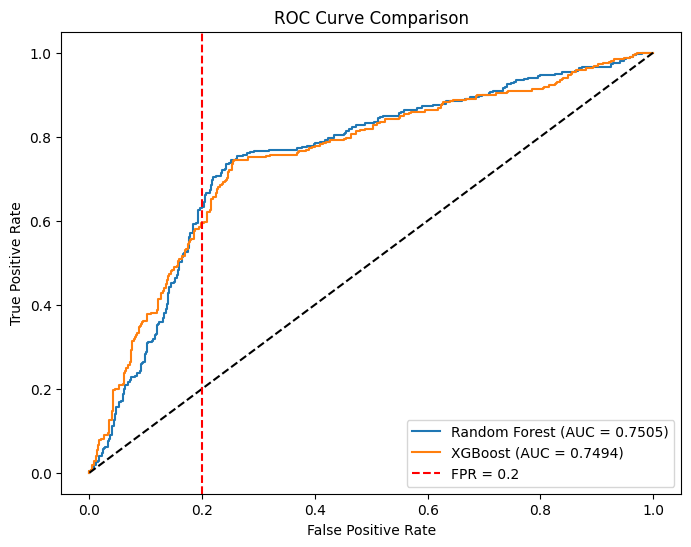

In [45]:
# Get prediction probabilities
y_test_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Random Forest
y_test_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # XGBoost

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)

# Compute AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line

# Add vertical line at FPR = 0.2
plt.axvline(x=0.2, color='red', linestyle='--', label="FPR = 0.2")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## Q3.2 - Model Evaluation

Which model would we chose and which metric did we chose to support our decision?

Because we have a slight imbalance in the label "Loyal Customer" (more non loyal customers) and the company wants to find the loyal customers we decided to optimize for the F1-Score.   
The recall focuses on capturing all the positive values (Loyal customers) and the prediction captures how many positive predictions were correct. The F1-balances those both metrics into consideration is therefore the best applicable evaluation metric in our case.

We optimized both models for the f1 score and used a grid search for hyperparameter tuning. We then looked at the performance on the train data and compared it with the performance on the test data to look for overfitting.

We found that both models performed very similarly. Random Forest (XGBoost) had an F1 score on the training data of 0.71303 (0.71412) and a F1 Score of 0.70398 (0.70398) and the training data.  
Both models show no signs of overfitting and also the other metrics were very close.  
  
Thus we looked at the Area under the Curve (AUC).  
Again both values were really similar with 0.7505 (0.7494).
We assume that the company would prefer low false positive rates <0.2. In this case you can see in the graph that the XGBoost will yield slightly higher True Positive Rates.  

For this reason we will choose the XGBoost model.


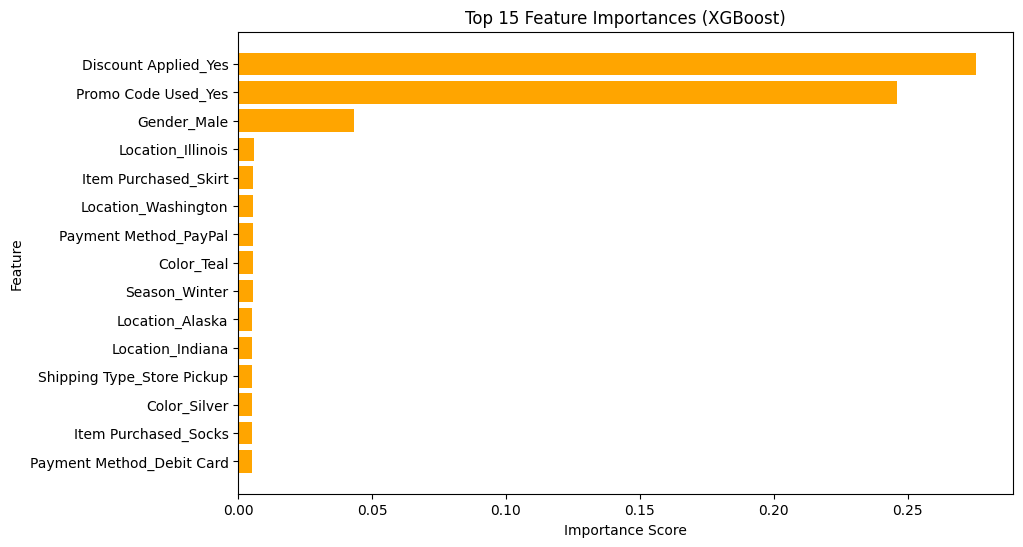

In [46]:
# Get feature importance from the best XGBoost model
feature_importance_xgb = best_xgb.feature_importances_

# Create a DataFrame for better visualization
feature_names = X_train.columns  # Get feature names from training data
importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_xgb})

# Sort by importance (descending)
importance_df_xgb = importance_df_xgb.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb["Feature"][:15], importance_df_xgb["Importance"][:15], color="orange")  # Top 15 features
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


**Interpretation:**

The driving factors of Loyalty are Discounts and Promo Codes. Gender also plays a small role.
Customers who used discounts or promo codes are significantly influencing loyalty predictions.
This could suggest that loyal customers are more likely to engage with promotional offers.
Alternatively, it might indicate that non-loyal customers only buy when discounts are available, meaning they aren’t truly "loyal" but rather price-sensitive.
Or it could mean that discount and promotions lead to loyalty. 

The company should closely monitor those behaviors.

# Q4

SmartRetail is looking to enhance its customer engagement and increase sales by moving away
from static product suggestions toward a more dynamic and personalized approach. Given the
available data, the company wants to explore how customer shopping behavior, purchase
frequency, and spending patterns can be leveraged to make more relevant recommendations.

## Q4.1 - Recommendation System

With this in mind, how can SmartRetail develop a recommendation system that better
aligns with customer purchasing behavior and preferences?  
Which approach do we chose and why? 

**Answer:**

SmartRetail aims to enhance customer engagement by moving away from static product recommendations toward a dynamic, personalized system. To achieve this, we implemented a hybrid recommendation model that combines:

**User-Based Collaborative Filtering (CF):** Recommends items that similar users have purchased.  
**Item-Based Collaborative Filtering (CF):** Suggests items similar to what the user has already purchased.  
**Feature-Enriched Content-Based Filtering:**  
We enhanced user similarity by incorporating Age, Subscription Status, Review Rating, and Purchase Amount (USD).  
We improved item similarity by including Category, Color.  

**Approach Justification:**  

User-Based CF ensures that customers receive peer-recommended products.
Item-Based CF helps suggest alternative products that match user interests.
Hybrid Filtering merges the best of both worlds to increase relevance.
Feature Engineering provides additional context to recommendations.

Our model provides 5 item recommendations for each customer


In [47]:
# 1. Load and Prepare Data
df = pd.read_csv("SmartRetail_dataset.csv")

# Set Customer ID as index since it's unique
df.set_index("Customer ID", inplace=True)

# Convert "Yes/No" categorical columns to binary (1/0)
df["Discount Applied"] = df["Discount Applied"].map({"Yes": 1, "No": 0})
df["Promo Code Used"] = df["Promo Code Used"].map({"Yes": 1, "No": 0})
df["Subscription Status"] = df["Subscription Status"].map({"Yes": 1, "No": 0})

# 2. Extract User Features (Expanded)
numerical_features = ["Age", "Review Rating", "Purchase Amount (USD)"]
binary_features = ["Discount Applied", "Promo Code Used", "Subscription Status"]

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Convert back to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=numerical_features)

# Combine standardized numerical features with binary features
user_features = df[binary_features].copy()
user_features = pd.concat([user_features, scaled_features_df], axis=1)

# 3. Compute User Similarity (User-Based CF)
user_similarity = cosine_similarity(user_features)
user_sim_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)

# 4. Build Item Similarity Matrix (Item-Based CF with Additional Features)
item_features = pd.get_dummies(df[["Item Purchased", "Category", "Color"]])
item_similarity = cosine_similarity(item_features.T)
item_sim_df = pd.DataFrame(item_similarity, index=item_features.columns, columns=item_features.columns)

# 5. Implement Hybrid Recommendation System
def hybrid_recommendation(user_id, top_n=5):
    if user_id not in user_sim_df.index:
        return []
    
    # Get most similar users
    similar_users = user_sim_df[user_id].sort_values(ascending=False).index[1:6]
    
    # Get most purchased items among similar users
    similar_users_purchases = df.loc[similar_users, "Item Purchased"].value_counts().index[:top_n]
    
    # Fix: Match Item Purchased to the column format in item_sim_df
    user_item = df.loc[user_id, "Item Purchased"]
    
    # Ensure the item exists before recommending
    if user_item not in item_sim_df.columns:
        return list(similar_users_purchases)
    
    # Get similar items
    similar_items = item_sim_df[user_item].sort_values(ascending=False).index[:top_n]
    
    # Merge recommendations
    final_recommendations = list(set(similar_users_purchases) | set(similar_items))
    
    return final_recommendations[:top_n]

# 6. Example: Get Recommendations for a User
user_id = 3  # Replace with any user ID
top_items = hybrid_recommendation(user_id, top_n=5)
print(f"Top recommendations for user {user_id}: {top_items}")

Top recommendations for user 3: ['Sunglasses', 'Jewelry', 'Sneakers', 'Socks']


## Q4.2 - Model Evaluation

In [48]:
#  7. Model Evaluation Metrics
def precision_at_k(user_id, k=5):
    actual_purchases = set([df.loc[user_id, "Item Purchased"]])
    recommendations = set(hybrid_recommendation(user_id, k))
    if not recommendations:
        return 0
    return len(actual_purchases & recommendations) / len(recommendations)

def recall_at_k(user_id, k=5):
    actual_purchases = set([df.loc[user_id, "Item Purchased"]])
    recommendations = set(hybrid_recommendation(user_id, k))
    if not actual_purchases:
        return 0
    return len(actual_purchases & recommendations) / len(actual_purchases)

def hit_rate(user_id, k=5):
    actual_purchases = set([df.loc[user_id, "Item Purchased"]])
    recommendations = set(hybrid_recommendation(user_id, k))
    return int(len(actual_purchases & recommendations) > 0)

#  8. Evaluate on Multiple Users
users = df.index[:50]  # Evaluate on first 50 users
precision_scores = [precision_at_k(user) for user in users]
recall_scores = [recall_at_k(user) for user in users]
hit_rates = [hit_rate(user) for user in users]

print(f"Average Precision@5: {np.mean(precision_scores):.4f}")
print(f"Average Recall@5: {np.mean(recall_scores):.4f}")
print(f"Hit Rate: {np.mean(hit_rates):.4f}")

Average Precision@5: 0.0570
Average Recall@5: 0.2600
Hit Rate: 0.2600


**Answer:**

Model Performance: The Numbers Tell the Story  
The hybrid recommendation system achieves the following performance:  

Precision@5: 5.7% → On average, only 5.7% of recommended items are relevant. This is quite low for a recommendation system.  
Recall@5: 26.0% → The model retrieves only 26% of the items that should have been recommended—meaning 74% of the user’s actual purchases are missing.  
Hit Rate: 26.0% → In 74% of cases, none of the recommended items match what the user actually bought.  
These numbers clearly indicate the recommendations are far from perfect. But why?  

- **Not Enough User History:**  
Each user has only one recorded purchase, meaning there’s no history to learn from.  
How can we recommend items if we only know about one past purchase per user? 

- **Lack of Rich User Features:**  
The model only has basic demographic and binary discount usage data—which doesn’t tell us much.  
No info on past shopping habits, preferred brands, or browsing behavior.  

- **Item Features are Too Limited**
The model can only differentiate items by Category, Item Purchased, and Color.  
No details like size, style, material, or occasion.  
Example: A user buys a "Shirt"—but the model has no way to tell if they like formal dress shirts or casual T-shirts.  

## Q4.3 - Suggestions

**Answer:**   
To improve the recommendation quality, we propose two key enhancements:

**1.) Increase Purchase History Per User:**  
The current dataset contains only one purchase per user.
If we had multiple purchase events per customer, we could better capture trends and provide more personalized suggestions. Its really hard to analyze customer behavior if you have only one transaction per customer.


**2.) Incorporate Additional Behavioral Features:**  
Adding features like:  
- Browsing history (Which products did the user view but not purchase?)  
- Cart Abandonment Data (Which products did they add but not buy?)  
- Time-Based Data (When does the user shop? Are they seasonal buyers?)  
- This would help refine the recommendations and improve personalization.  